# **Fashion MINST Classification Project**

In [10]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split

## **Importing the data**

In [11]:
train_data = pd.read_csv('fashion-mnist_train.csv')
test_data = pd.read_csv('fashion-mnist_test.csv')

print(f'Train Dataset shape: {train_data.shape}')
print(f'Test Dataset shape: {test_data.shape}')

Train Dataset shape: (60000, 785)
Test Dataset shape: (10000, 785)


In [12]:
# Training data
X_train = train_data.drop('label', axis = 1)/255
y_train = train_data['label']

# Testing data
X_test = test_data.drop('label', axis = 1)/255
y_test = test_data['label']

print(f'Features train shape: {X_train.shape}')
print(f'Target train shape: {y_train.shape}')
print(f'\nFeatures test shape: {X_test.shape}')
print(f'Target test shape: {y_test.shape}')

Features train shape: (60000, 784)
Target train shape: (60000,)

Features test shape: (10000, 784)
Target test shape: (10000,)


### Exploring the images

In [4]:
# Image labels dictionary
img_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

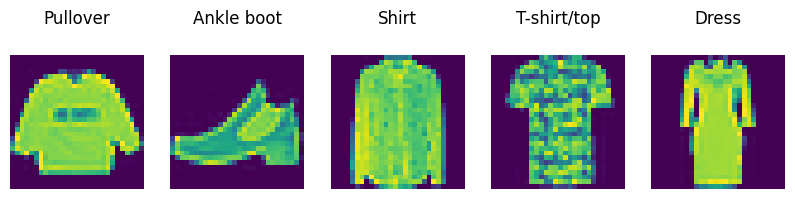

In [5]:
# Create a figure with a grid of subplots
fig, axes = plt.subplots(1, 5, figsize=(10, 3))

for i in range(5):
    axes[i].matshow(X_train.iloc[i].values.reshape(28, 28))
    axes[i].set_title(img_labels[y_train.iloc[i]])
    axes[i].axis('off')

# Show the plot
plt.show()

## **ANN 1:**
- 3 Hidden Layers
- Learning rate 0.001

## Training the ANN

In [6]:

model = keras.Sequential([
  keras.layers.Dense(256, input_shape=(784,), activation='relu'),
  keras.layers.Dropout(0.2),
  #keras.layers.Dense(256, activation='relu'),
  keras.layers.Dense(128, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(64, activation='relu'),
  keras.layers.Dropout(0.2),
  keras.layers.Dense(10, activation='softmax')
])

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

training_history = model.fit(X_train, y_train, epochs=20, batch_size = 32, validation_split=0.1)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 16s 7ms/step - accuracy: 0.7147 - loss: 0.7905 - val_accuracy: 0.8485 - val_loss: 0.4202
Epoch 2/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8389 - loss: 0.4505 - val_accuracy: 0.8607 - val_loss: 0.3876
Epoch 3/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8541 - loss: 0.4058 - val_accuracy: 0.8758 - val_loss: 0.3620
Epoch 4/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.8611 - loss: 0.3827 - val_accuracy: 0.8680 - val_loss: 0.3634
Epoch 5/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8693 - loss: 0.3591 - val_accuracy: 0.8712 - val_loss: 0.3459
Epoch 6/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8716 - loss: 0.3520 - val_accuracy: 0.8745 - val_loss: 0.3358
Epoch 7/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 18s 7ms/step - accuracy: 0.8789 - loss: 0.3339 - val_accuracy: 0.8790 - val_loss: 0.3369
Epoch 8/20
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 13s 7ms/step - accuracy: 0.8809 - loss: 0

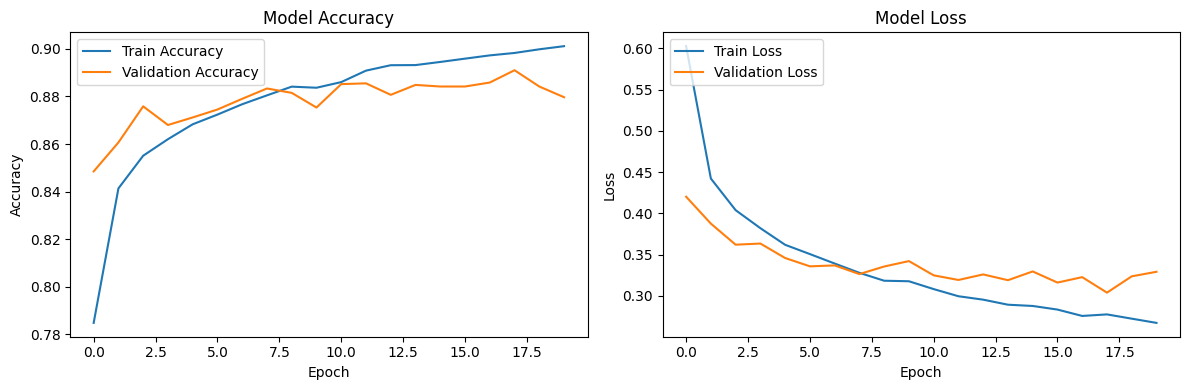

In [7]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Training Loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8887 - loss: 0.3103
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
[8.1649595e-01 2.9765899e-09 2.4297315e-04 2.6018248e-05 4.2485090e-06
 1.5956430e-14 1.8323046e-01 2.4447644e-14 3.3431195e-07 1.1051468e-15]


[0, 1, 2, 2, 3]

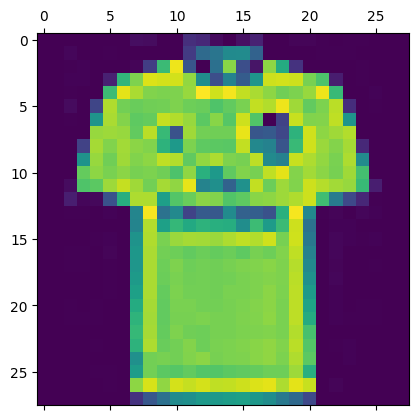

In [8]:
model.evaluate(X_test, y_test)

y_predicted = model.predict(X_test)
print(y_predicted[0])
plt.matshow(X_test.iloc[0].values.reshape(28, 28))


np.argmax(y_predicted[0])
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:5]

Text(95.72222222222221, 0.5, 'Truth')

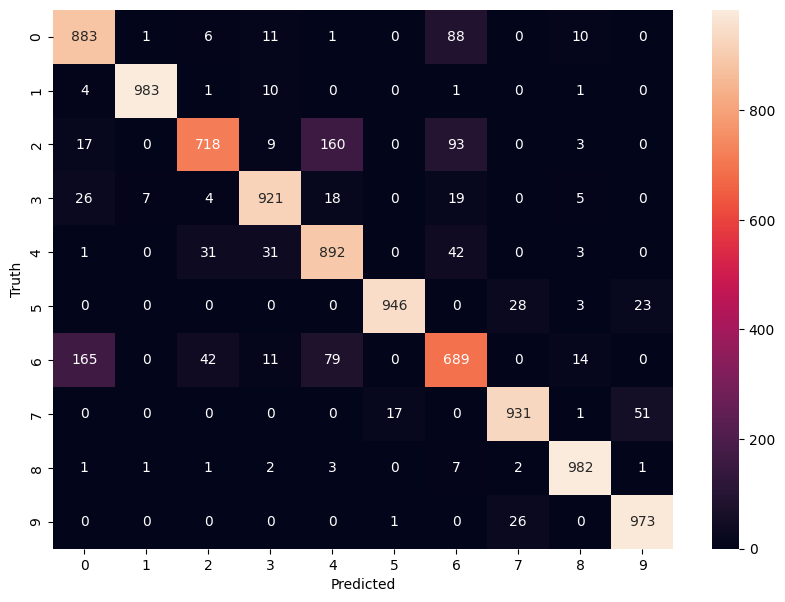

In [9]:
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

## **ANN 2:**
- 3 Hidden Layers
- Learning rate 0.001
- Use Dropout rate to prevent overfitting
- Add batch normalization
- Add early stop. This will stop the training when there are signs of overfitting.
- Use reduction of learning rate when accuracy encounters a plateau.

In [13]:


# Model architecture with Dropout, Batch Normalization, and Early Stopping
model = keras.Sequential([
    keras.layers.Dense(256, input_shape=(784,), activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.2),  # Dropout to prevent overfitting
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.2),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.BatchNormalization(),  # Add batch normalization
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')  # Softmax for multi-class classification
])

# Compile the model with Adam optimizer and learning rate scheduler
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

# Early stopping to prevent overfitting and learning rate reduction on plateau
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3)

# Train the model with validation split and callbacks
training_history = model.fit(
    X_train, y_train,
    epochs=50,  # Increased epochs with early stopping
    batch_size=32,
    validation_split=0.1,  # Keep 10% of data for validation
    callbacks=[early_stopping, reduce_lr]  # Apply early stopping and reduce learning rate on plateau
)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 24s 11ms/step - accuracy: 0.7386 - loss: 0.7730 - val_accuracy: 0.8208 - val_loss: 0.4845 - learning_rate: 0.0010
Epoch 2/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8267 - loss: 0.4877 - val_accuracy: 0.8333 - val_loss: 0.4598 - learning_rate: 0.0010
Epoch 3/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 8ms/step - accuracy: 0.8387 - loss: 0.4549 - val_accuracy: 0.8222 - val_loss: 0.4784 - learning_rate: 0.0010
Epoch 4/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8453 - loss: 0.4333 - val_accuracy: 0.8472 - val_loss: 0.4242 - learning_rate: 0.0010
Epoch 5/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.8512 - loss: 0.4160 - val_accuracy: 0.8583 - val_loss: 0.4067 - learning_rate: 0.0010
Epoch 6/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 15s 9ms/step - accuracy: 0.8586 - loss: 0.3977 - val_accuracy: 0.8707 - val_loss: 0.3564 - learning_rate: 0.0010
Epoch 7/50
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 14s 9ms/step - accuracy: 0.

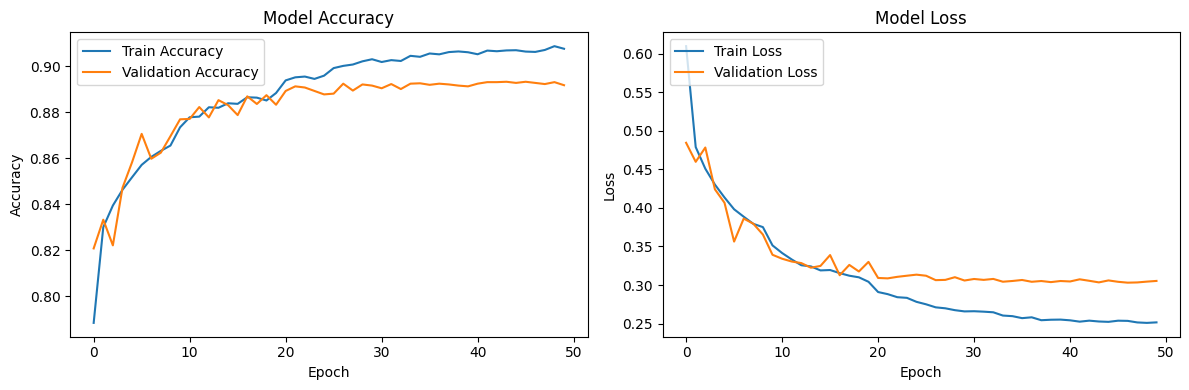

In [14]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 4))

# Training Accuracy
plt.subplot(1, 2, 1)
plt.plot(training_history.history['accuracy'], label='Train Accuracy')
plt.plot(training_history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

# Training Loss
plt.subplot(1, 2, 2)
plt.plot(training_history.history['loss'], label='Train Loss')
plt.plot(training_history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper left')

plt.tight_layout()
plt.show()